In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
import pandas as pd
from scipy import stats
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno;

In [2]:
url = "https://raw.githubusercontent.com/diegojeda/Curso-Analytics---Drilling-Bits/master/Dataset/BaseLimpia.csv"

base = pd.read_csv(url,error_bad_lines=False)

In [3]:
# Importamos librerias para escalar los datos, dividir el dataset y traer el modelo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings("ignore")

# Creamos las matrices para los modelos
X = base.drop('Log ROP', axis=1)
y = base[['Log ROP']]

# Escalamos los datos
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
pd.DataFrame(X).head()

# Dividimos los datos de manera aleatoria con el 25% para test y 75% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101);

In [4]:
# Implementaremos el modelo de mejor R2

from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [10**i for i in range(-5,5)],
                        'gamma': [10**i for i in range(-5,5)],
                       "epsilon": [10**i for i in range(-10,5)]} 

# Definimos las metricas sobre las que queremos evaluar
metricas = ["neg_mean_squared_error","r2"]

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svm.SVR(kernel='rbf'), 
                             param_grid = grid_hiperparametros, 
                             cv = 10, #folds
                             scoring = metricas, 
                             refit = 'r2',
                             return_train_score = True,
                             n_jobs = -1,
                             verbose=1)


# Aplicamos la busqueda
busqueda_grid.fit(X_train, y_train);

Fitting 10 folds for each of 1500 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 5776 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 9376 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 13776 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 15000 out of 15000 | elapsed:  1.0min finished


In [5]:
busqueda_grid.best_params_

{'C': 100, 'epsilon': 1e-09, 'gamma': 0.1}

In [6]:
busqueda_grid.best_score_

0.7456262445979197

In [7]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,2340
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ada Boost Classifier,0.7746,0.8073,0.6026,0.7205,0.6493,0.4859,0.4952,0.0825
1,CatBoost Classifier,0.7746,0.8459,0.6301,0.6975,0.6510,0.4880,0.4967,3.3980
2,Linear Discriminant Analysis,0.7710,0.8076,0.5830,0.7291,0.6348,0.4733,0.4879,0.0071
3,Ridge Classifier,0.7673,0.0000,0.5617,0.7307,0.6228,0.4608,0.4768,0.0056
4,Logistic Regression,0.7636,0.8032,0.5617,0.7107,0.6145,0.4507,0.4649,0.0323
5,Random Forest Classifier,0.7615,0.8106,0.5228,0.7169,0.5964,0.4360,0.4504,0.0272
6,Extreme Gradient Boosting,0.7579,0.8007,0.6406,0.6621,0.6399,0.4605,0.4696,0.1396
7,Extra Trees Classifier,0.7561,0.8121,0.5719,0.6847,0.6149,0.4404,0.4497,0.1494
8,Light Gradient Boosting Machine,0.7524,0.8095,0.6196,0.6617,0.6292,0.4460,0.4544,0.1306
9,Gradient Boosting Classifier,0.7505,0.8305,0.5933,0.6681,0.6213,0.4375,0.4441,0.1207


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2340)

In [10]:
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.7414,0.5789,0.7333,0.6471,0.4882,0.4954
1,0.6852,0.6985,0.6842,0.5417,0.6047,0.3489,0.3555
2,0.7407,0.8105,0.6316,0.6316,0.6316,0.4316,0.4316
3,0.8519,0.9308,0.7368,0.8235,0.7778,0.6672,0.6695
4,0.7963,0.8511,0.5263,0.8333,0.6452,0.5123,0.5389
5,0.7778,0.8489,0.6316,0.7059,0.6667,0.5008,0.5025
6,0.8148,0.8135,0.7368,0.7368,0.7368,0.5940,0.5940
7,0.7170,0.7143,0.4444,0.6154,0.5161,0.3234,0.3320
8,0.8491,0.8968,0.6111,0.9167,0.7333,0.6339,0.6592
9,0.7358,0.7675,0.4444,0.6667,0.5333,0.3592,0.3736


In [11]:
adaboost.score

<bound method ClassifierMixin.score of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2340)>

In [12]:
tuned_adaboost = tune_model(adaboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8346,0.5263,0.7692,0.6250,0.4749,0.4921
1,0.7222,0.7684,0.6842,0.5909,0.6341,0.4122,0.4151
2,0.7593,0.8083,0.5789,0.6875,0.6286,0.4524,0.4561
3,0.9074,0.9398,0.8421,0.8889,0.8649,0.7945,0.7952
4,0.7963,0.8707,0.5263,0.8333,0.6452,0.5123,0.5389
5,0.7778,0.8368,0.6316,0.7059,0.6667,0.5008,0.5025
6,0.7778,0.8647,0.6842,0.6842,0.6842,0.5128,0.5128
7,0.7170,0.7762,0.5000,0.6000,0.5455,0.3424,0.3454
8,0.8868,0.9032,0.7222,0.9286,0.8125,0.7332,0.7451
9,0.7736,0.7730,0.5000,0.7500,0.6000,0.4508,0.4688


In [13]:
# creating a decision tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.6774,0.5263,0.6250,0.5714,0.3682,0.3711
1,0.6481,0.6444,0.6316,0.5000,0.5581,0.2723,0.2775
2,0.7222,0.7015,0.6316,0.6000,0.6154,0.3982,0.3985
3,0.7222,0.7135,0.6842,0.5909,0.6341,0.4122,0.4151
4,0.7037,0.6391,0.4211,0.6154,0.5000,0.2998,0.3107
5,0.7407,0.7398,0.7368,0.6087,0.6667,0.4577,0.4633
6,0.7037,0.7113,0.7368,0.5600,0.6364,0.3941,0.4047
7,0.6604,0.6079,0.4444,0.5000,0.4706,0.2219,0.2227
8,0.6981,0.6500,0.5000,0.5625,0.5294,0.3083,0.3095
9,0.6415,0.5937,0.4444,0.4706,0.4571,0.1899,0.1900


In [14]:
# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.8361,0.2632,0.7143,0.3846,0.2408,0.2929
1,0.7593,0.7812,0.7895,0.6250,0.6977,0.5021,0.5116
2,0.7037,0.7617,0.4737,0.6000,0.5294,0.3175,0.3223
3,0.7963,0.8865,0.6842,0.7222,0.7027,0.5479,0.5484
4,0.7963,0.8195,0.6316,0.7500,0.6857,0.5367,0.5410
5,0.7037,0.8015,0.4737,0.6000,0.5294,0.3175,0.3223
6,0.7407,0.7947,0.5789,0.6471,0.6111,0.4176,0.4190
7,0.6792,0.7222,0.3889,0.5385,0.4516,0.2332,0.2394
8,0.7547,0.8444,0.5556,0.6667,0.6061,0.4301,0.4339
9,0.7170,0.7627,0.3333,0.6667,0.4444,0.2818,0.3123


In [15]:
# create a model
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.7414,0.5789,0.7333,0.6471,0.4882,0.4954
1,0.6852,0.6985,0.6842,0.5417,0.6047,0.3489,0.3555
2,0.7407,0.8105,0.6316,0.6316,0.6316,0.4316,0.4316
3,0.8519,0.9308,0.7368,0.8235,0.7778,0.6672,0.6695
4,0.7963,0.8511,0.5263,0.8333,0.6452,0.5123,0.5389
5,0.7778,0.8489,0.6316,0.7059,0.6667,0.5008,0.5025
6,0.8148,0.8135,0.7368,0.7368,0.7368,0.5940,0.5940
7,0.7170,0.7143,0.4444,0.6154,0.5161,0.3234,0.3320
8,0.8491,0.8968,0.6111,0.9167,0.7333,0.6339,0.6592
9,0.7358,0.7675,0.4444,0.6667,0.5333,0.3592,0.3736


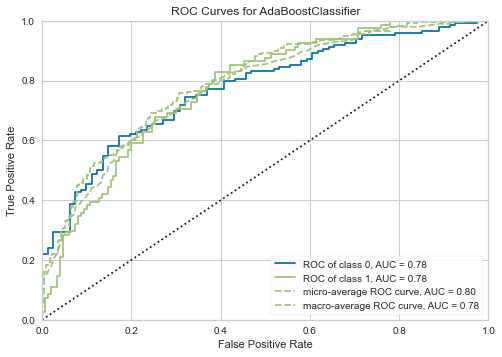

In [16]:
# AUC plot
plot_model(adaboost, plot = 'auc')

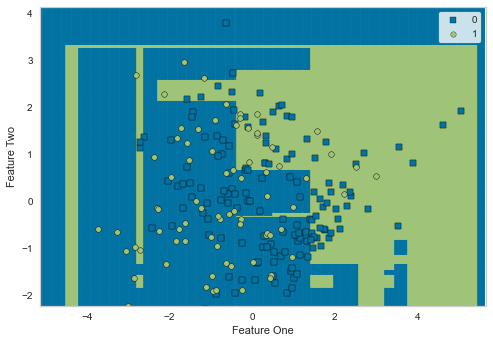

In [17]:
# Decision Boundary
plot_model(adaboost, plot = 'boundary')

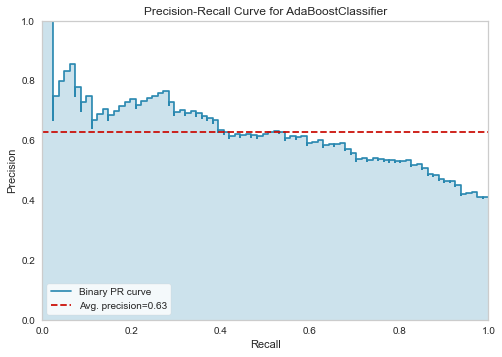

In [18]:
# Precision Recall Curve
plot_model(adaboost, plot = 'pr')

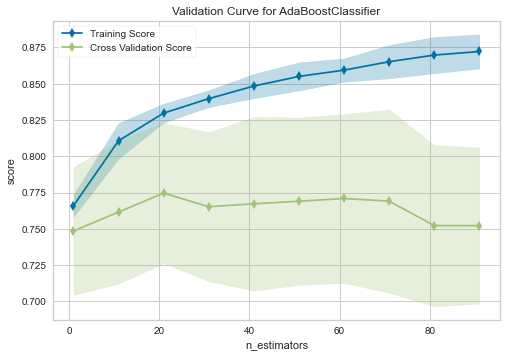

In [19]:
# Validation Curve
plot_model(adaboost, plot = 'vc')

In [20]:
evaluate_model(adaboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
# create a model
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8226,0.5263,0.7692,0.6250,0.4749,0.4921
1,0.7037,0.7429,0.8947,0.5484,0.6800,0.4323,0.4778
2,0.7407,0.7985,0.5789,0.6471,0.6111,0.4176,0.4190
3,0.8519,0.9338,0.7368,0.8235,0.7778,0.6672,0.6695
4,0.7778,0.7774,0.5789,0.7333,0.6471,0.4882,0.4954
5,0.7407,0.7880,0.6842,0.6190,0.6500,0.4449,0.4463
6,0.7407,0.8030,0.6842,0.6190,0.6500,0.4449,0.4463
7,0.7358,0.7286,0.6111,0.6111,0.6111,0.4111,0.4111
8,0.8491,0.8778,0.8333,0.7500,0.7895,0.6723,0.6746
9,0.6604,0.7349,0.2778,0.5000,0.3571,0.1512,0.1633


In [22]:
# create a model
rf = create_model('rf')
# predict test / hold-out dataset
rf_holdout_pred = predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6753,0.7204,0.3827,0.5536,0.4526,0.2326,0.2406


In [23]:
predictions = predict_model(rf, data = diabetes)
predictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,1.0
1,1,85,66,29,0,26.6,0.351,31,0,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1,0.8
3,1,89,66,23,94,28.1,0.167,21,0,0,0.1
4,0,137,40,35,168,43.1,2.288,33,1,1,0.9
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,0.3
764,2,122,70,27,0,36.8,0.340,27,0,0,0.3
765,5,121,72,23,112,26.2,0.245,30,0,0,0.0
766,1,126,60,0,0,30.1,0.349,47,1,1,0.8


In [24]:
deploy_model(model = rf, model_name = 'rf_aws', platform = 'aws', 
             authentication =  {'bucket'  : 'pycaret-test'})

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\pycaret\classification.py", line 11331, in deploy_model
    import awscli
ModuleNotFoundError: No module named 'awscli'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-9924d2a8952e>", line 1, in <module>
    deploy_model(model = rf, model_name = 'rf_aws', platform = 'aws',
  File "C:\Users\pc\anaconda3\lib\site-packages\pycaret\classification.py", line 11334, in deploy_model
    sys.exit("awscli library not found. pip install awscli to use deploy_model function.")
SystemExit: awscli library not found. pip install awscli to use deploy_model function.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Us

TypeError: object of type 'NoneType' has no len()

In [ ]:
# creating model
adaboost = create_model('ada')
# saving model
save_model(adaboost, model_name = 'ada_for_deployment')

In [ ]:
# Experiment No. 2
from pycaret.regression import *

r2 = setup(diabetes, target = 'Class variable', session_id = 123,
           normalize = True)

In [ ]:
# Model Training and Validation 
lr = create_model('lr')

In [ ]:
# plot residuals of trained model
plot_model(lr, plot = 'residuals')

In [ ]:
# save transformation pipeline and model 
save_model(lr, model_name = 'C:/Users/pc/Documents/GitHub/Bit-Optimization-ML/test_deploy')